## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
from textblob import TextBlob
import nltk
import re
from sklearn.metrics import accuracy_score
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.corpus import wordnet
from wordcloud import STOPWORDS
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

## Import/Read Datasets

In [2]:
fake = pd.read_csv("Fake.csv",encoding='ISO-8859-1')
fake.head()

title   
0   Donald Trump Sends Out Embarrassing New Yearâ...  \
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamaâs Na...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject   
0  Donald Trump just couldn t wish all Americans ...    News  \
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [3]:
true = pd.read_csv("True.csv", encoding='ISO-8859-1')
true.head()

title   
0  As U.S. budget fight looms, Republicans flip t...  \
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject   
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews  \
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

## Exploratory Data Analysis (EDA)

In [4]:
true.shape, fake.shape

((21417, 4), (23481, 4))

In [5]:
true.info(),
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [6]:
true.columns, fake.columns

(Index(['title', 'text', 'subject', 'date'], dtype='object'),
 Index(['title', 'text', 'subject', 'date'], dtype='object'))

In [7]:
# Adding new column to distribute Fake and Real news

# fake news represented by '0'
# true news represented by '1'


true['category'] = '1'
fake['category'] = '0'

In [8]:
true.head()

title   
0  As U.S. budget fight looms, Republicans flip t...  \
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject   
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews  \
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date category  
0  December 31, 2017         1  
1  December 29, 2017         1  
2  December 31, 2017         1  
3  December 30, 2017         1  
4  December 29, 2017         1

In [9]:
fake.head()

title   
0   Donald Trump Sends Out Embarrassing New Yearâ...  \
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamaâs Na...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject   
0  Donald Trump just couldn t wish all Americans ...    News  \
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date category  
0  December 31, 2017        0  
1  December 31, 2017        0  
2  December 30, 2017        0  
3  December 29, 2017        0  
4  December 25, 2017        0

In [10]:
# Resetting index

df = pd.concat([true,fake]).reset_index(drop = True)
df.shape

(44898, 5)

In [11]:
df.head()

title   
0  As U.S. budget fight looms, Republicans flip t...  \
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject   
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews  \
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date category  
0  December 31, 2017         1  
1  December 29, 2017         1  
2  December 31, 2017         1  
3  December 30, 2017         1  
4  December 29, 2017         1

In [12]:
df.tail()

title   
44893  McPain: John McCain Furious That Iran Treated ...  \
44894  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
44895  Sunnistan: US and Allied âSafe Zoneâ Plan ...   
44896  How to Blow $700 Million: Al Jazeera America F...   
44897  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject   
44893  21st Century Wire says As 21WIRE reported earl...  Middle-east  \
44894  21st Century Wire says It s a familiar theme. ...  Middle-east   
44895  Patrick Henningsen  21st Century WireRemember ...  Middle-east   
44896  21st Century Wire says Al Jazeera America will...  Middle-east   
44897  21st Century Wire says As 21WIRE predicted in ...  Middle-east   

                   date category  
44893  January 16, 2016        0  
44894  January 16, 2016        0  
44895  January 15, 2016        0  
44896  January 14, 2016        0  
44897  January 12, 2016        0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     44898 non-null  object
 1   text      44898 non-null  object
 2   subject   44898 non-null  object
 3   date      44898 non-null  object
 4   category  44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [14]:
df.subject.value_counts()

subject
politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: count, dtype: int64

<Axes: xlabel='subject', ylabel='count'>

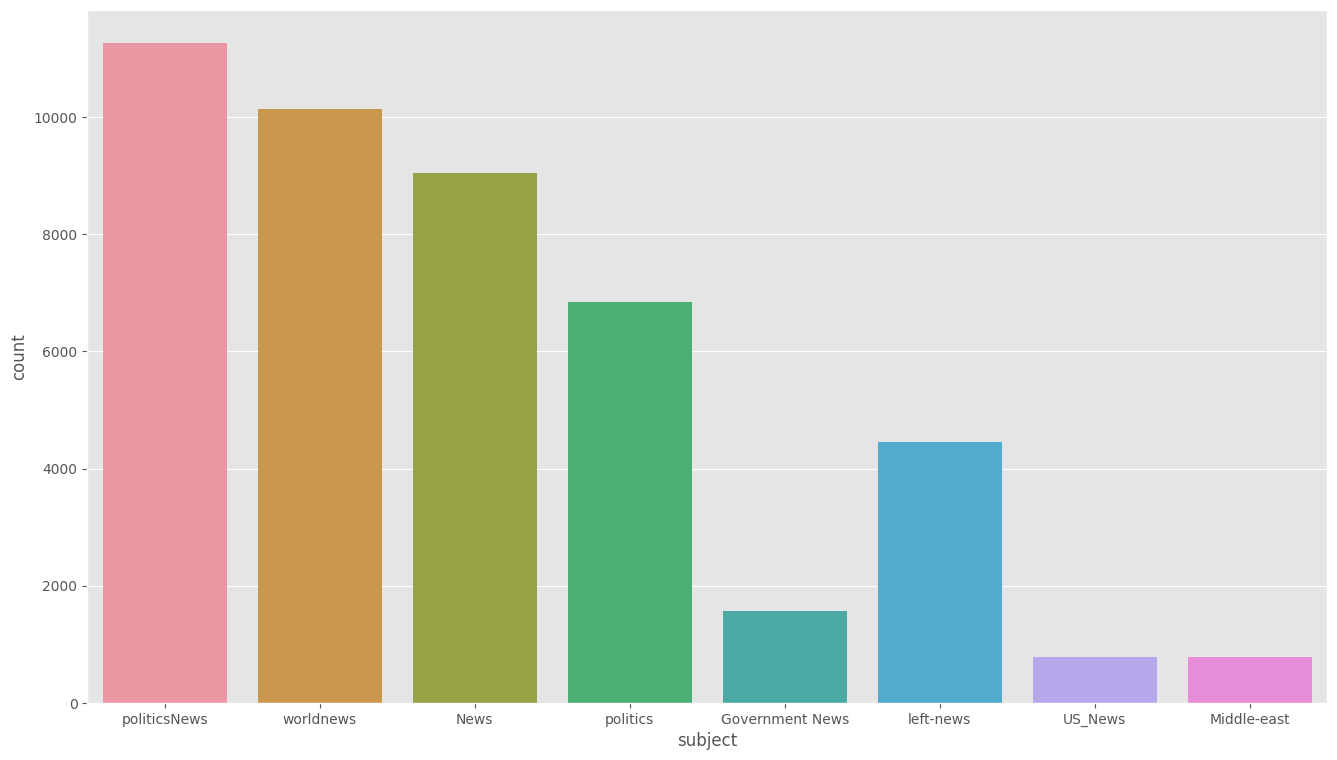

In [15]:
# lets visualize data based on the subject of the news

plt.figure(figsize=(16,9))
sns.countplot(x='subject', data=df)

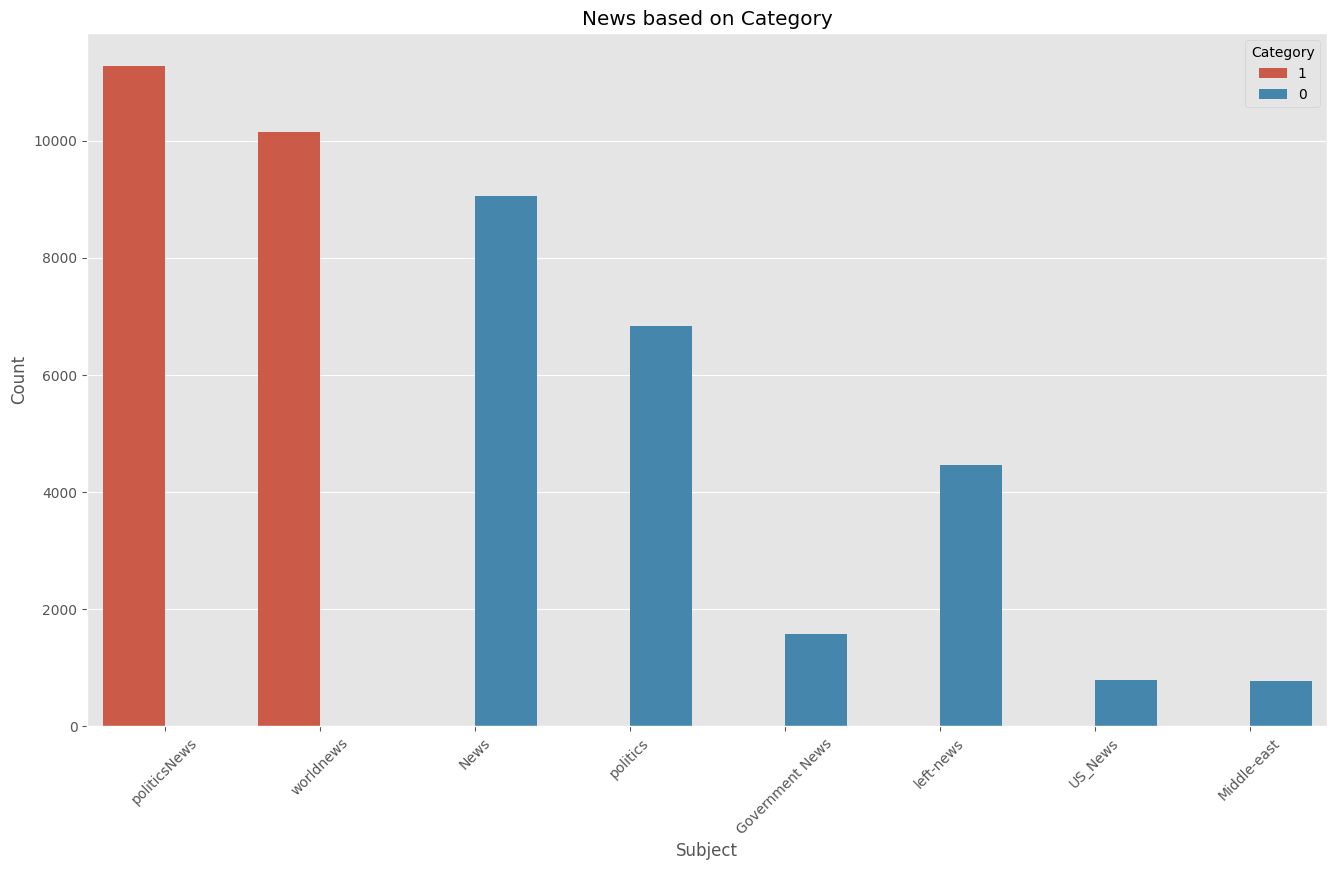

In [16]:
# breakup of true and fake news based on the category.

plt.figure(figsize=(16, 9))
sns.countplot(x='subject', hue='category', data=df)
plt.legend(title='Category', labels=['1', '0'])
plt.title('News based on Category')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [17]:
# Shuffling the data

from sklearn.utils import shuffle
df = shuffle(df)
df = df.reset_index(drop = True)

In [18]:
df.head(10)

title   
0  Japan considers refitting helicopter carrier f...  \
1  Trump says unnamed country plans to build, exp...   
2  Rights groups urge UK to request Bahrain free ...   
3   Trump Says He Doesnât Want Stars At Inaugur...   
4  Kurds stick with independence vote, 'never goi...   
5  JUSTICE SCALIA Found Dead With âPillow Over ...   
6  Ardern to be next New Zealand PM, spelling cha...   
7  WOW! UNHINGED CLOWN DEMOCRAT Goes Nuts On Hous...   
8   Trump Just Got DESTROYED By One Of Americaâ...   
9  Cuba and United States draw up roadmap for tal...   

                                                text       subject   
0  TOKYO (Reuters) - Japan is considering refitti...     worldnews  \
1  INDIANAPOLIS (Reuters) - President Donald Trum...  politicsNews   
2  DUBAI (Reuters) - A group of 13 human rights o...     worldnews   
3  President-elect Donald Trump said he isn t int...          News   
4  ERBIL, Iraq/ISTANBUL (Reuters) - Iraq s Kurds ...     worldnews   
5  It was just announced that there will be no au...      politics   
6  WELLINGTON (Reuters) - New Zealand will get it...     worldnews   
7  .@rosadelauro:  What does the GOP stand for?  ...      politics   
8  One of America s most legendary journalists, D...          News   
9  HAVANA (Reuters) - Cuba and the United States ...  politicsNews   

                  date category  
0   December 26, 2017         1  
1  September 27, 2017         1  
2    October 27, 2017         1  
3    December 19, 2016        0  
4  September 24, 2017         1  
5         Feb 14, 2016        0  
6    October 18, 2017         1  
7         Mar 24, 2017        0  
8         June 2, 2016        0  
9        May 16, 2016         1

<Axes: ylabel='count'>

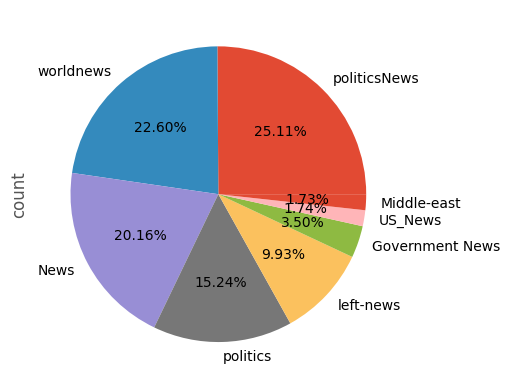

In [19]:
df['subject'].value_counts().plot(kind='pie',autopct='%0.02f%%')

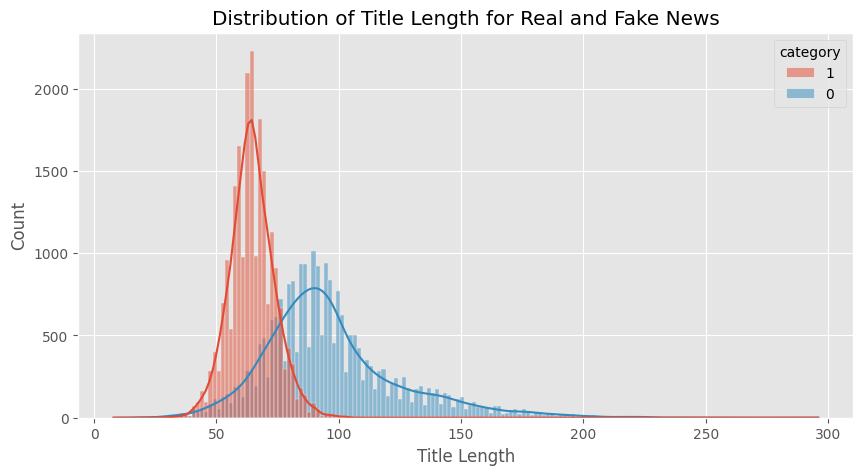

In [20]:
#Text Length Analysis
df['title_len'] = df['title'].apply(len)
plt.figure(figsize=(10, 5))
sns.histplot(data= df, x='title_len', hue='category', kde=True)
plt.title('Distribution of Title Length for Real and Fake News')
plt.xlabel('Title Length')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='category', ylabel='count'>

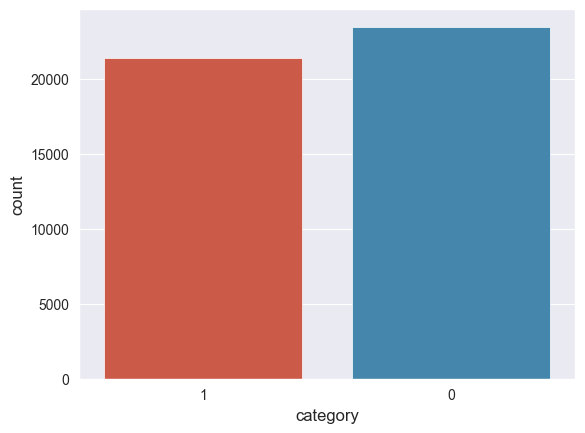

In [21]:
# Visualizing balacing of the data 

import seaborn as sns
sns.set_style("darkgrid")
sns.countplot(x= 'category', data = df)

In [22]:
df.isnull().sum()

title        0
text         0
subject      0
date         0
category     0
title_len    0
dtype: int64

In [23]:
# From all the above exploration, it shows we have pretty balanced data with no null values
# There are total 44898 observations

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      44898 non-null  object
 1   text       44898 non-null  object
 2   subject    44898 non-null  object
 3   date       44898 non-null  object
 4   category   44898 non-null  object
 5   title_len  44898 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [25]:
# Merge the 'title' and 'text' column which will be used in NLP model
df['text'] = df['title'] + " " + df['text']


In [26]:
df.head()

title   
0  Japan considers refitting helicopter carrier f...  \
1  Trump says unnamed country plans to build, exp...   
2  Rights groups urge UK to request Bahrain free ...   
3   Trump Says He Doesnât Want Stars At Inaugur...   
4  Kurds stick with independence vote, 'never goi...   

                                                text       subject   
0  Japan considers refitting helicopter carrier f...     worldnews  \
1  Trump says unnamed country plans to build, exp...  politicsNews   
2  Rights groups urge UK to request Bahrain free ...     worldnews   
3   Trump Says He Doesnât Want Stars At Inaugur...          News   
4  Kurds stick with independence vote, 'never goi...     worldnews   

                  date category  title_len  
0   December 26, 2017         1         85  
1  September 27, 2017         1         71  
2    October 27, 2017         1         66  
3    December 19, 2016        0         91  
4  September 24, 2017         1         74

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      44898 non-null  object
 1   text       44898 non-null  object
 2   subject    44898 non-null  object
 3   date       44898 non-null  object
 4   category   44898 non-null  object
 5   title_len  44898 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [28]:
del df['title']

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       44898 non-null  object
 1   subject    44898 non-null  object
 2   date       44898 non-null  object
 3   category   44898 non-null  object
 4   title_len  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


# Data cleaning:
    1.Remove unwanted characters
    2.Text normalization
    3.Tokenization
    4.lemmatization
    5.Join the text

In [30]:
#Using wordnet POS (part of speech) to correct the word grammetically.

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [31]:
def data_processing(text):
    text = text.lower() # Helps to convert all text to lowercase
    text = re.sub(r'https?:\S+|www\S+', '', text, flags=re.MULTILINE)  # Regular Expression helps to remove 'https','www',unwanted urls from the text
    text = re.sub(r'\@\S+|\#', '', text)  # Regular Expression helps to remove unwanted symbols and hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Regular Expression helps to remove unwanted punctuations
    text_tokens = word_tokenize(text)  # Tokenization helps to split words into individual words
    
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in text_tokens if not word in stop_words]

    lemmatizer = WordNetLemmatizer()
    df_lem = [lemmatizer.lemmatize(word, get_wordnet_pos(word[0])) for word in text_tokens]
    
    return " ".join(df_lem) # this will join the filtered text in to a single string

In [32]:
# Returns cleaned data (removes all the hashtags, urls, punctuations)

df['text'] = df['text'].apply(data_processing)

In [33]:
df.head(10)

text       subject   
0  japan considers refitting helicopter carrier f...     worldnews  \
1  trump say unnamed country plan to build expand...  politicsNews   
2  right group urge uk to request bahrain free ac...     worldnews   
3  trump say he doesnât want star at inauguration...          News   
4  kurd stick with independence vote never going ...     worldnews   
5  justice scalia found dead with âpillow over hi...      politics   
6  ardern to be next new zealand pm spelling chan...     worldnews   
7  wow unhinged clown democrat go nut on house fl...      politics   
8  trump just got destroyed by one of americaâs m...          News   
9  cuba and united state draw up roadmap for talk...  politicsNews   

                  date category  title_len  
0   December 26, 2017         1         85  
1  September 27, 2017         1         71  
2    October 27, 2017         1         66  
3    December 19, 2016        0         91  
4  September 24, 2017         1         74  
5         Feb 14, 2016        0         75  
6    October 18, 2017         1         75  
7         Mar 24, 2017        0         85  
8         June 2, 2016        0         88  
9        May 16, 2016         1         66

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       44898 non-null  object
 1   subject    44898 non-null  object
 2   date       44898 non-null  object
 3   category   44898 non-null  object
 4   title_len  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [35]:
df['category'] = df['category'].astype(int)

# Filter the 'True' and 'Fake' categories separately
true_category_data = df[df['category'] == 1]
fake_category_data = df[df['category'] == 0]

Text(0.5, 1.0, 'Category distribution')

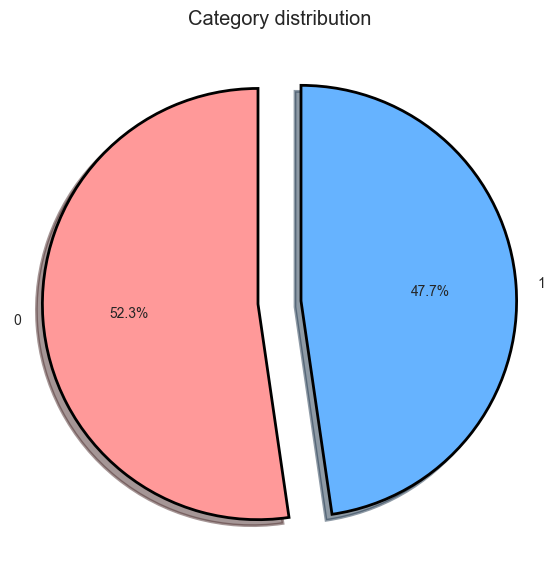

In [36]:
fig = plt.figure(figsize=(7,7))
colors = ("#ff9999", "#66b3ff")
wp = {'linewidth' : 2, 'edgecolor' : "black"}
tags = df['category'].value_counts()
explode = (0.1, 0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label= '')
plt.title('Category distribution')

In [37]:
# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

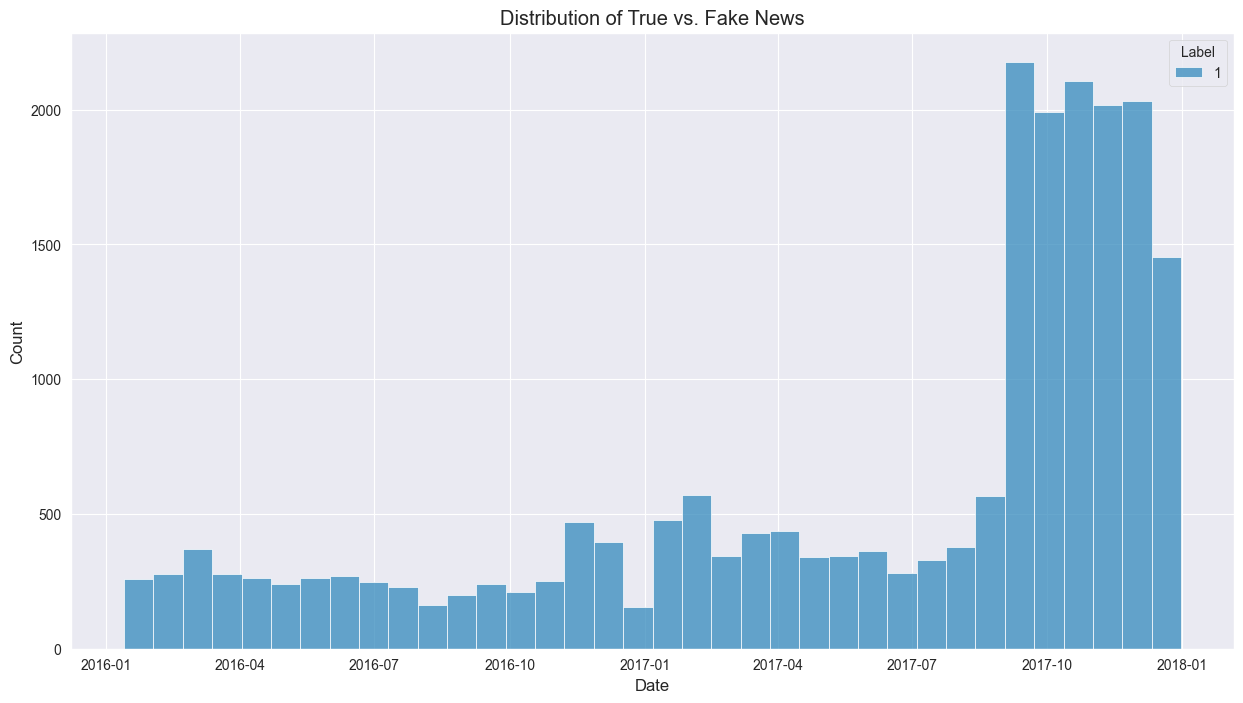

In [38]:
plt.figure(figsize=(15, 8))
sns.histplot(data=df, x='date', hue='category', multiple='stack')
plt.title('Distribution of True vs. Fake News')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Label', labels=['1', '0'])
plt.show()

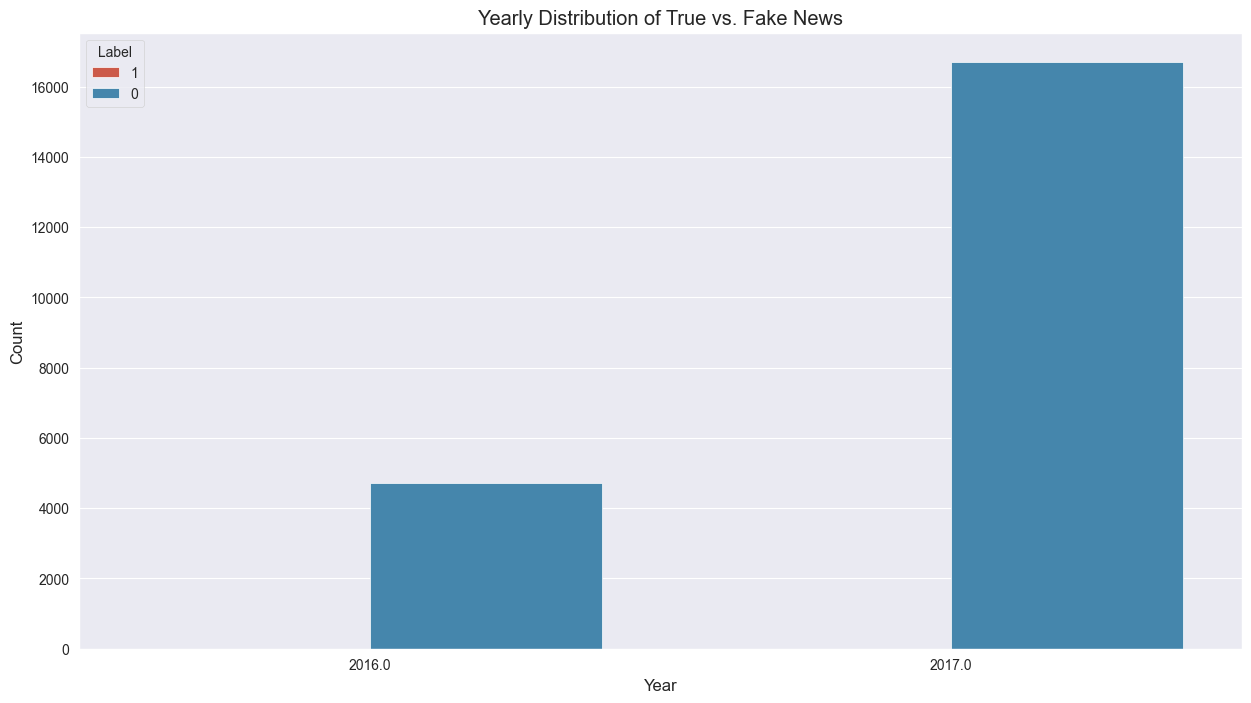

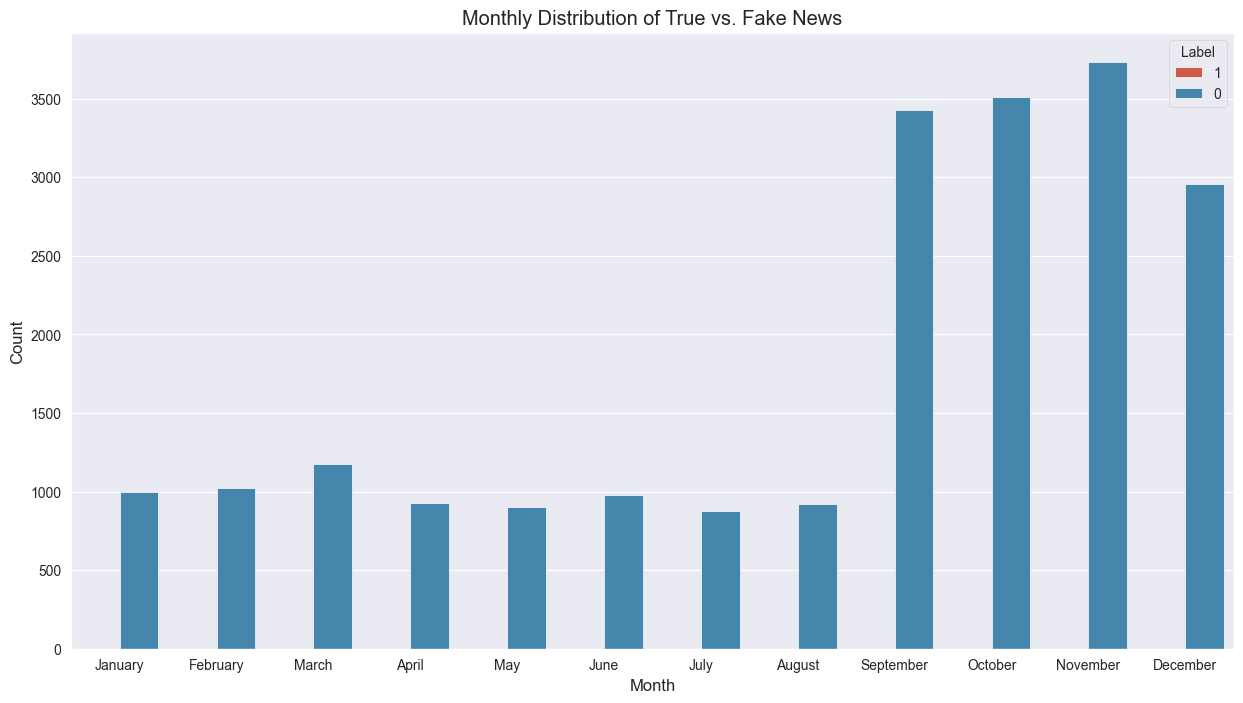

In [39]:
import calendar

month_names = list(calendar.month_name)[1:]

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='year', hue='category')
plt.title('Yearly Distribution of True vs. Fake News')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Label', labels=['1', '0'])
plt.show()

plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='month', hue='category')
plt.title('Monthly Distribution of True vs. Fake News')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Label', labels=['1', '0'])
plt.xticks(range(12), month_names)
plt.show()

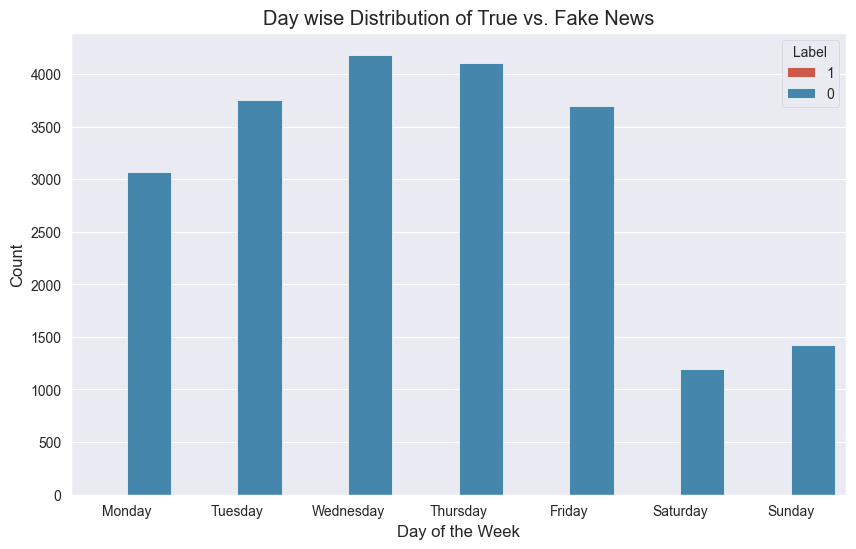

In [40]:
df['day_of_week'] = df['date'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='day_of_week', hue='category', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day wise Distribution of True vs. Fake News')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Label', labels=['1', '0'])
plt.show()

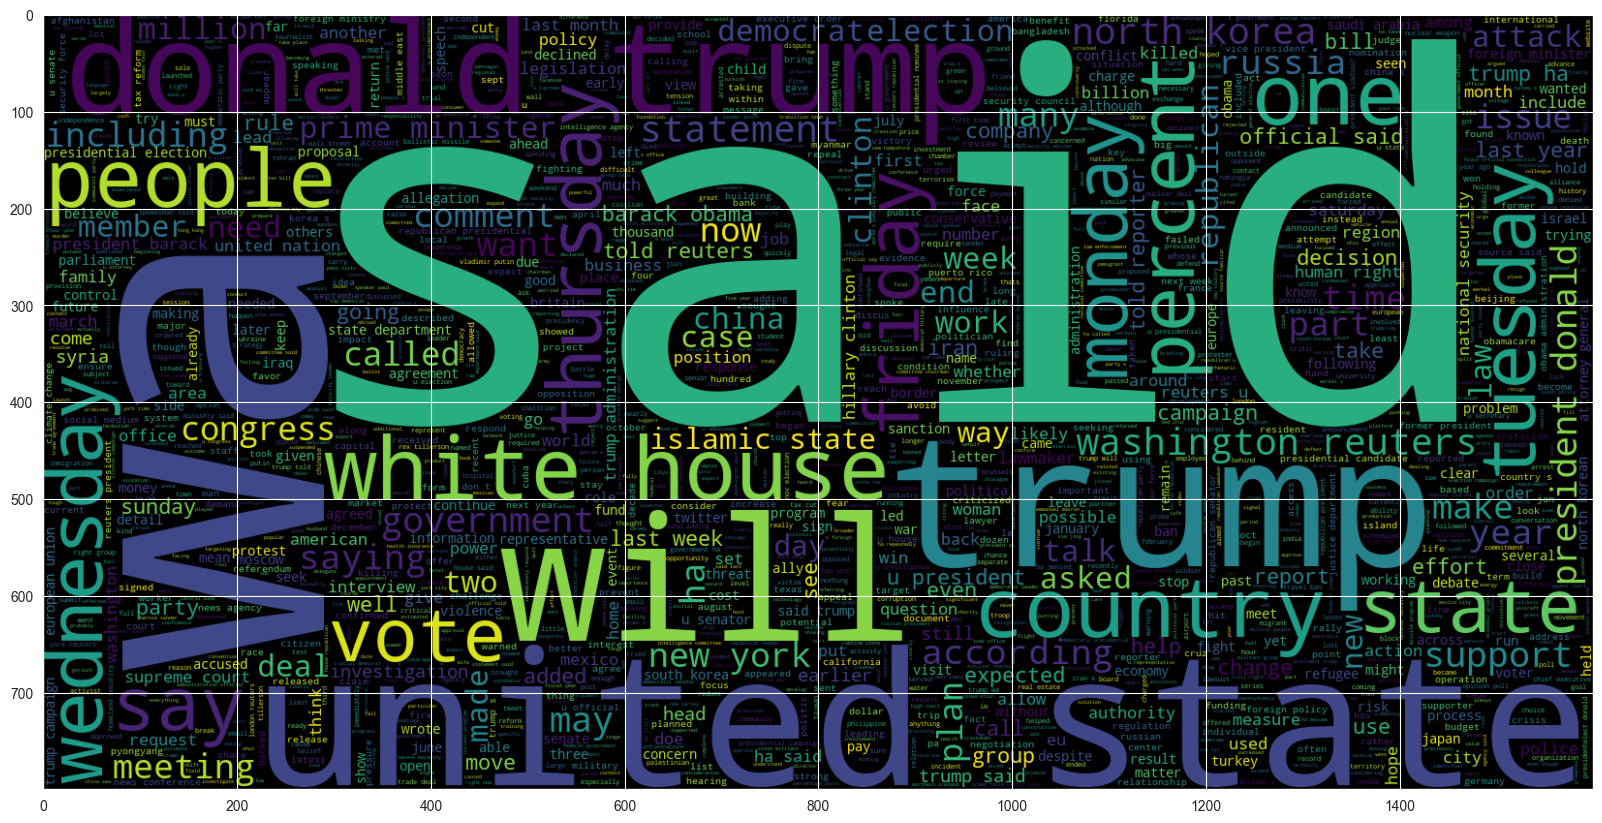

In [41]:
# Exploring most used word in both data sets, True and Fake
# Below is the word cloud for most frequently used words in True dataset

plt.figure(figsize= (20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(df[df.category==1].text))
plt.imshow(wc, interpolation = 'bilinear')

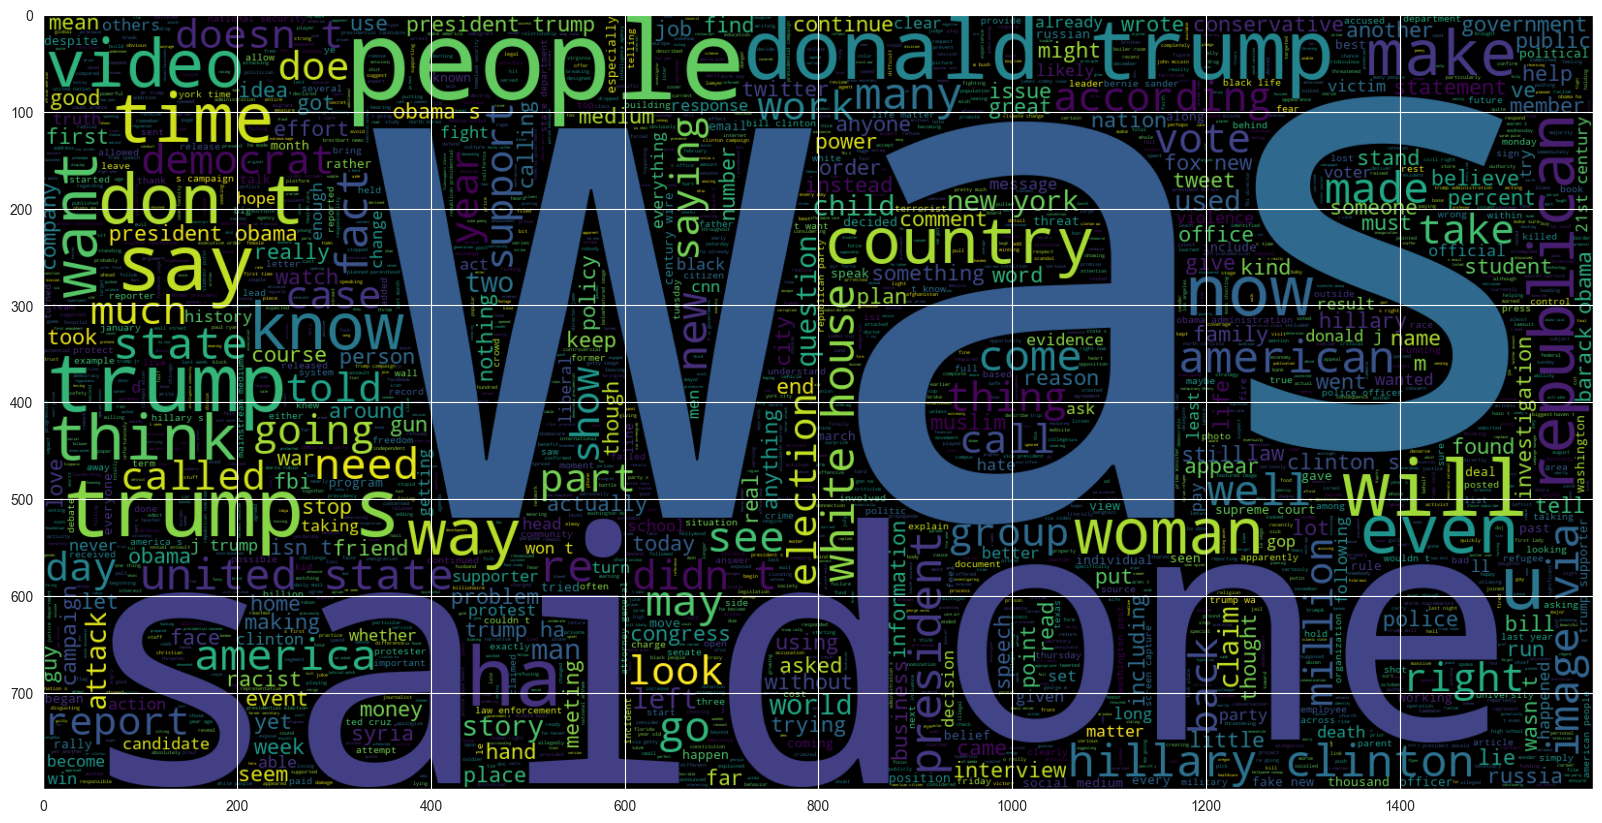

In [42]:
# Exploring most used word in both data sets, True and Fake
# Below is the word cloud for most frequently used words in Fake dataset
plt.figure(figsize= (20,20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(df[df.category==0].text))
plt.imshow(wc, interpolation = 'bilinear')

In [43]:
# Below is the graph to show number of available characters in True/Real and Fake news

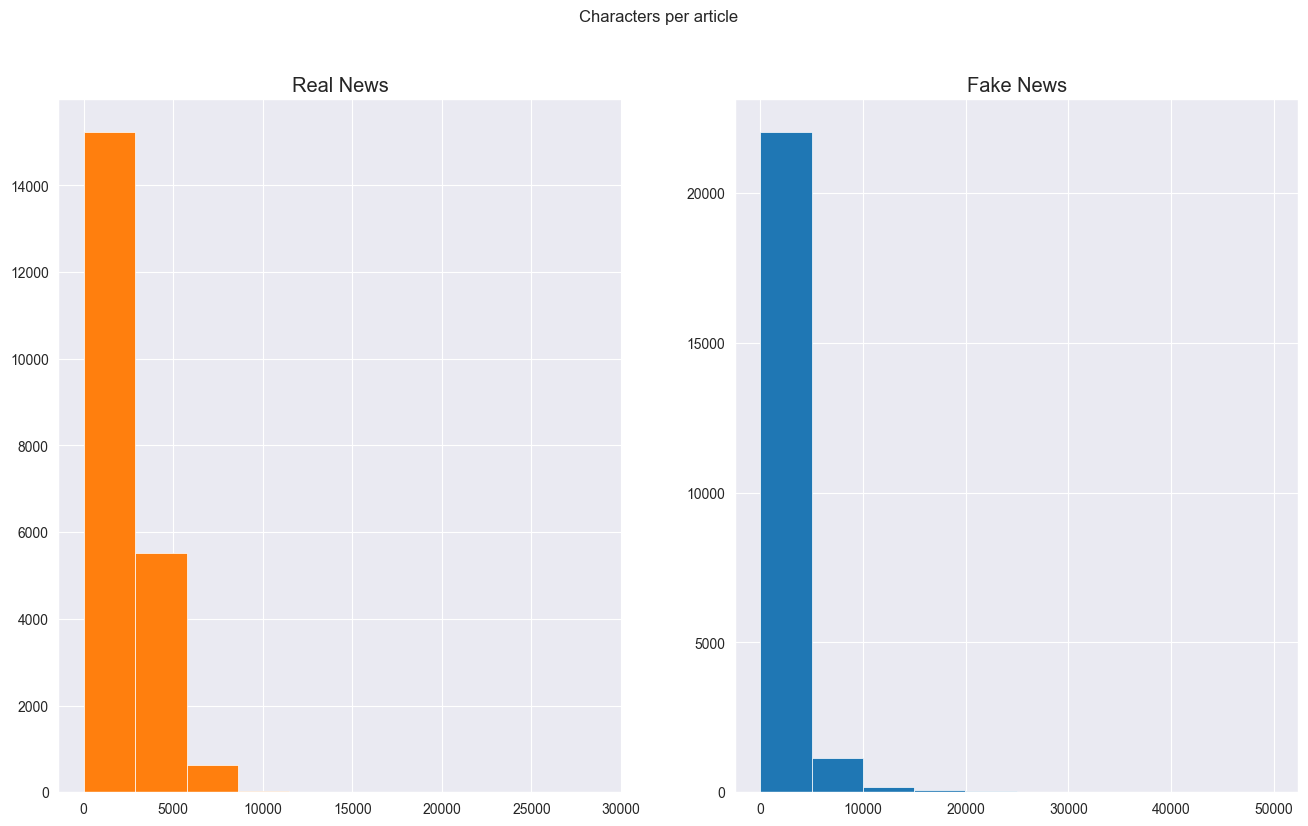

In [44]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,9))
text_len = df[df['category']==1]['text'].str.len()
ax1.hist(text_len,color = 'tab:orange')
ax1.set_title('Real News')
text_len=df[df['category']==0]['text'].str.len()
ax2.hist(text_len,color = 'tab:blue')
ax2.set_title('Fake News')
fig.suptitle('Characters per article')

plt.show()


In [45]:
# By looking at above graph it seems like 5000 or less characters in the text are more common in True/Real News
# where 10000 or less characters are most common in Fake news

In [46]:
# Below graph shows no. of original and fake texts available in both True/Real and Fake news

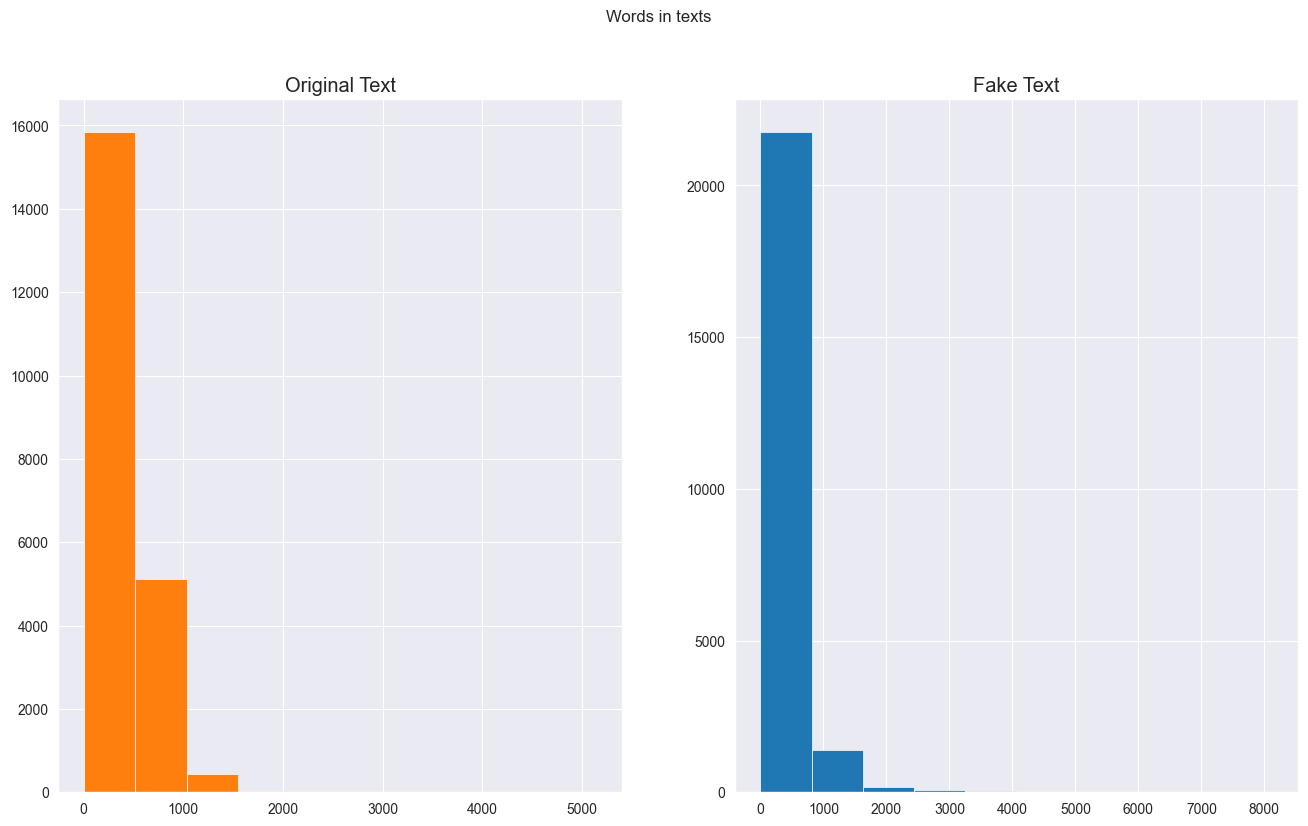

In [47]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(16,9))
text_len = df[df['category']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color = 'tab:orange')
ax1.set_title('Original Text')
text_len=df[df['category']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color = 'tab:blue')
ax2.set_title('Fake Text')
fig.suptitle('Words in texts')

plt.show()

In [48]:
df1 = df.drop(['title_len','year','month','day_of_week'],axis=1)
df1.head()

text       subject       date   
0  japan considers refitting helicopter carrier f...     worldnews 2017-12-26  \
1  trump say unnamed country plan to build expand...  politicsNews 2017-09-27   
2  right group urge uk to request bahrain free ac...     worldnews 2017-10-27   
3  trump say he doesnât want star at inauguration...          News        NaT   
4  kurd stick with independence vote never going ...     worldnews 2017-09-24   

   category  
0         1  
1         1  
2         1  
3         0  
4         1

# Setiment Analysis

In [49]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

In [50]:
df1['polarity'] = df1['text'].apply(polarity)
df1.head(10)

text       subject       date   
0  japan considers refitting helicopter carrier f...     worldnews 2017-12-26  \
1  trump say unnamed country plan to build expand...  politicsNews 2017-09-27   
2  right group urge uk to request bahrain free ac...     worldnews 2017-10-27   
3  trump say he doesnât want star at inauguration...          News        NaT   
4  kurd stick with independence vote never going ...     worldnews 2017-09-24   
5  justice scalia found dead with âpillow over hi...      politics        NaT   
6  ardern to be next new zealand pm spelling chan...     worldnews 2017-10-18   
7  wow unhinged clown democrat go nut on house fl...      politics        NaT   
8  trump just got destroyed by one of americaâs m...          News        NaT   
9  cuba and united state draw up roadmap for talk...  politicsNews 2016-05-16   

   category  polarity  
0         1  0.090909  
1         1  0.090194  
2         1  0.132764  
3         0  0.154167  
4         1 -0.029855  
5         0  0.062054  
6         1  0.118618  
7         0  0.100000  
8         0  0.111905  
9         1  0.032312

In [51]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label==0:
        return "Neutral"
    elif label>0:
        return "Positive"

df1['sentiment'] = df1['polarity'].apply(sentiment)
df1.head()


text       subject       date   
0  japan considers refitting helicopter carrier f...     worldnews 2017-12-26  \
1  trump say unnamed country plan to build expand...  politicsNews 2017-09-27   
2  right group urge uk to request bahrain free ac...     worldnews 2017-10-27   
3  trump say he doesnât want star at inauguration...          News        NaT   
4  kurd stick with independence vote never going ...     worldnews 2017-09-24   

   category  polarity sentiment  
0         1  0.090909  Positive  
1         1  0.090194  Positive  
2         1  0.132764  Positive  
3         0  0.154167  Positive  
4         1 -0.029855  Negative

<Axes: xlabel='sentiment', ylabel='count'>

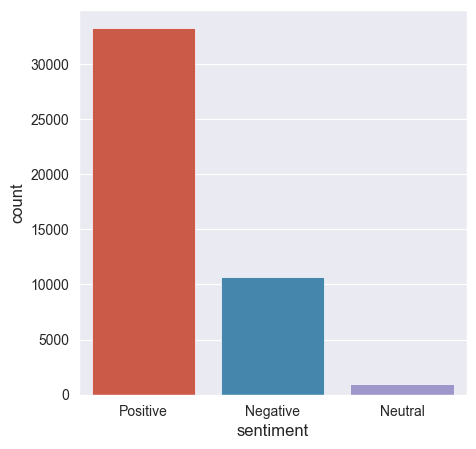

In [52]:
import seaborn as sns
fig = plt.figure(figsize = (5,5))
sns.countplot(x='sentiment', data = df1)

Text(0.5, 1.0, 'Sentiment distribution')

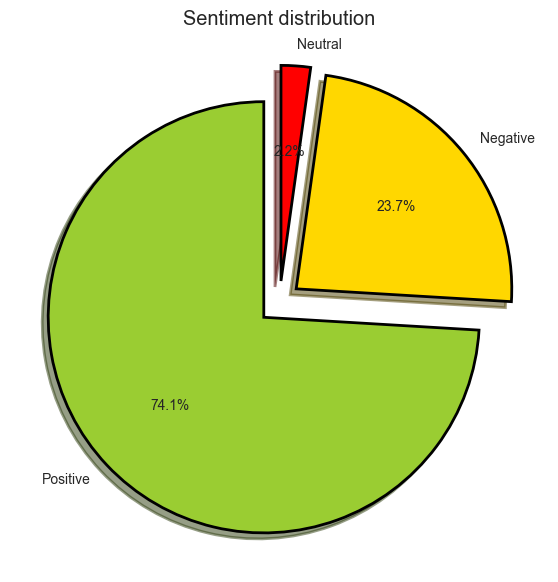

In [53]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold","red")
wp = {'linewidth' : 2, 'edgecolor' : "black"}
tags = df1['sentiment'].value_counts()
explode = (0.1, 0.1, 0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label= '')
plt.title('Sentiment distribution')

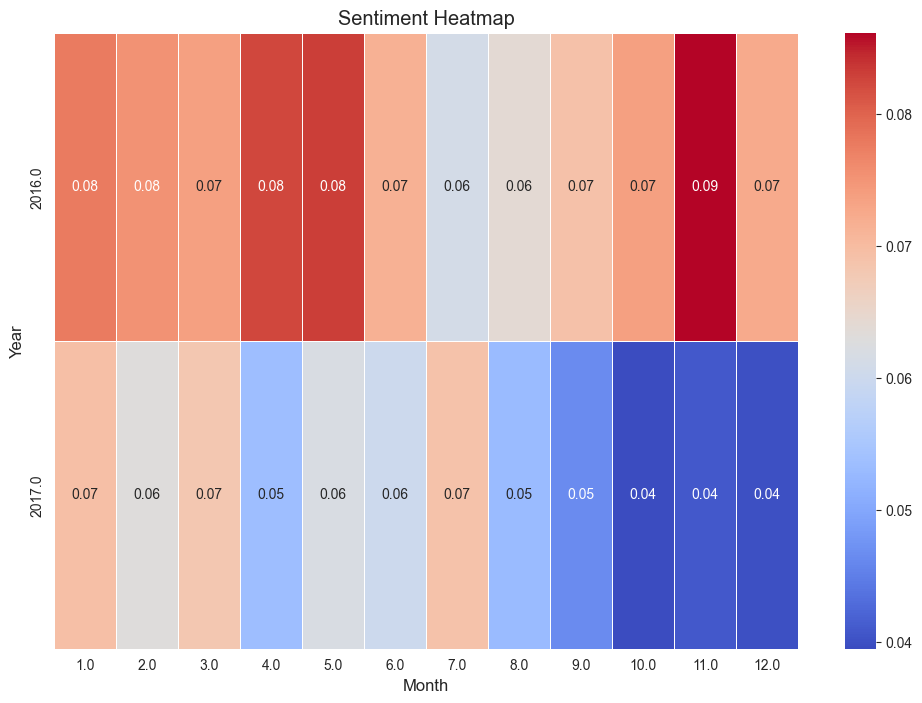

In [54]:
# Create a pivot table to aggregate sentiment scores over months and years
sentiment_pivot = df1.pivot_table(index=df1['date'].dt.year, columns=df1['date'].dt.month, values='polarity', aggfunc='mean')

# Plot the sentiment heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sentiment_pivot, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Sentiment Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

## Model Building

### Spliting of Data

In [55]:
X = df['text']
y = df['category']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Before we can train an algorithm to classify fake news articles, we need to extract features from it. it means reducing the mass of
# unstructured data into some uniform set of attributes that an algorithm can understand. 
# This will help to remove words which appear in more than 70% of the articles

# Creating TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [58]:
tfidf_vectorizer

TfidfVectorizer(max_features=5000)

In [59]:
print(X_train_tfidf[0].toarray())

[[0. 0. 0. ... 0. 0. 0.]]


# 1.Naive Bayes

In [60]:
# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [61]:
# Predictions on the test set
y_pred_nb = nb_classifier.predict(X_test_tfidf)

In [62]:
y_pred = nb_classifier.predict(X_test_tfidf)

# Calculate and print the accuracy
test_accuracy = accuracy_score(y_test, y_pred_nb)
train_accuracy = accuracy_score(y_train, nb_classifier.predict(X_train_tfidf))

print('Training Accuracy:', train_accuracy)
print('Test Accuracy:', test_accuracy)

Training Accuracy: 0.9404755275906231
Test Accuracy: 0.9384187082405345


In [63]:
# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      4709
           1       0.93      0.94      0.94      4271

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980

Confusion Matrix:
 [[4430  279]
 [ 274 3997]]


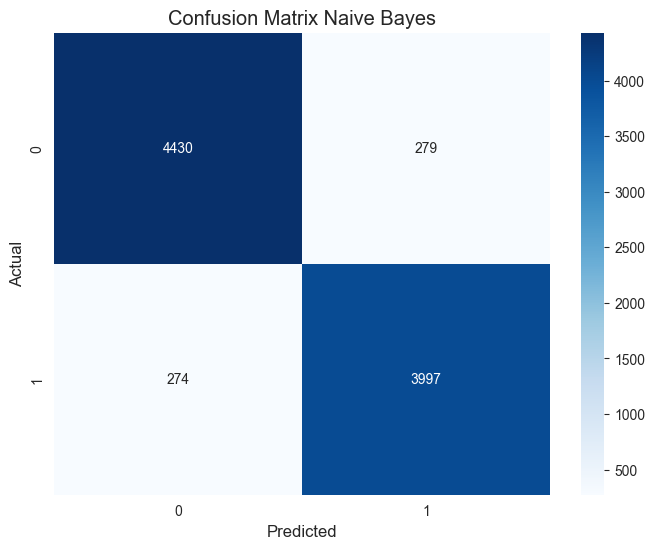

In [64]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Naive Bayes')
plt.show()

In [65]:
# 0 -  4368 were fake articles and the model also predicted it as fake
# 0 - 267 artcles were fake however model predicytd as Real
# 1 - 336 artcles were real however predicted as fake
# 1 - 3996 articles were real and predicted as real

# 2.Logistic regression

In [66]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred_lr = lr_classifier.predict(X_test_tfidf)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4709
           1       0.99      0.99      0.99      4271

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

Confusion Matrix:
 [[4649   60]
 [  32 4239]]


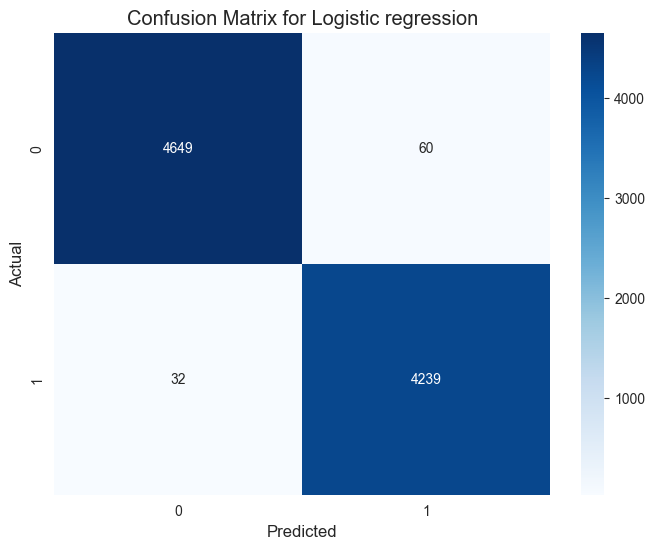

In [67]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic regression')
plt.show()

# 3.SVM

In [68]:
from sklearn.svm import LinearSVC

# Initialize the SVM classifier
svm_classifier = LinearSVC()
svm_classifier.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4709
           1       1.00      1.00      1.00      4271

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Confusion Matrix:
 [[4688   21]
 [  18 4253]]


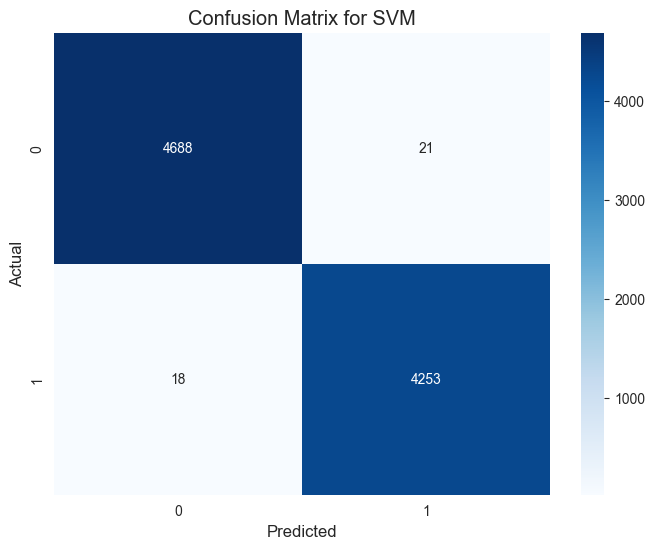

In [69]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

# 4.Random forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred_rf = rf_classifier.predict(X_test_tfidf)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4709
           1       1.00      1.00      1.00      4271

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Confusion Matrix:
 [[4704    5]
 [  11 4260]]


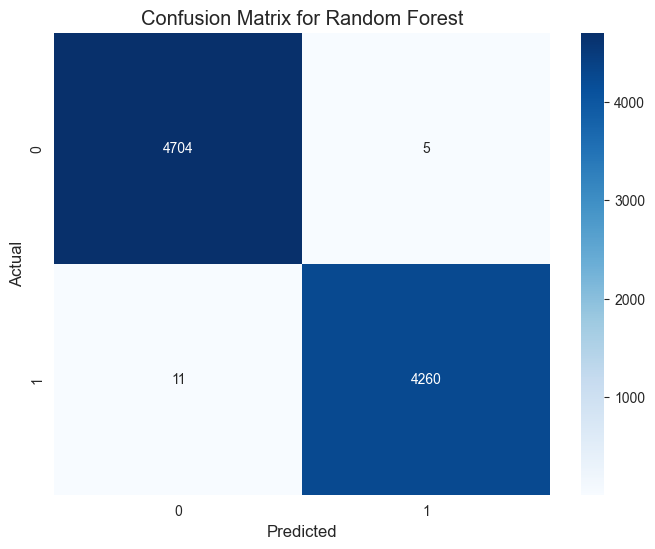

In [71]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# 5. K-Nearest neighbor

In [72]:

from sklearn.neighbors import KNeighborsClassifier

# Initialize the Random Forest classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred_knn = knn_classifier.predict(X_test_tfidf)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

NameError: name 'asdfghj' is not defined

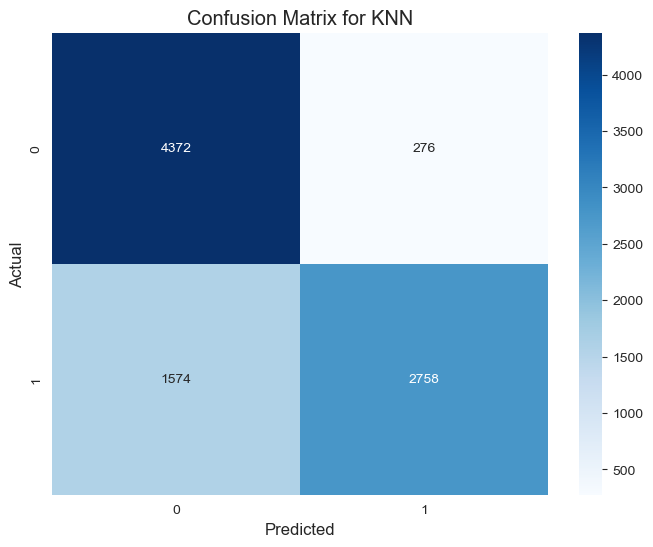

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()

# 6.Gradient Boosting

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Random Forest classifier
GB_classifier = GradientBoostingClassifier()
GB_classifier.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred_gb = GB_classifier.predict(X_test_tfidf)

KeyboardInterrupt: 

In [ ]:
# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4648
           1       0.99      1.00      0.99      4332

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Confusion Matrix:
 [[4618   30]
 [  14 4318]]


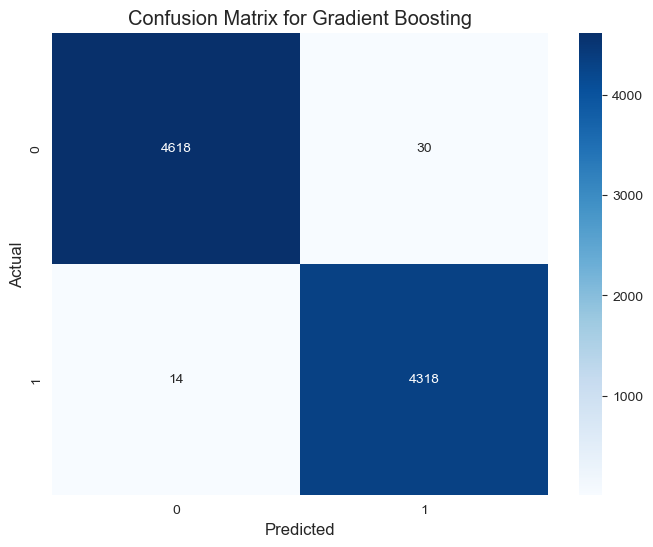

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()

# 7.Ridge Classifier

In [78]:
from sklearn.linear_model import RidgeClassifier

# Initialize the Random Forest classifier
ridge_classifier = RidgeClassifier()
ridge_classifier.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred_ridge = ridge_classifier.predict(X_test_tfidf)

NameError: name 'GB_classifier' is not defined

In [ ]:
# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_ridge))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ridge))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4648
           1       0.99      1.00      0.99      4332

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Confusion Matrix:
 [[4618   30]
 [  14 4318]]


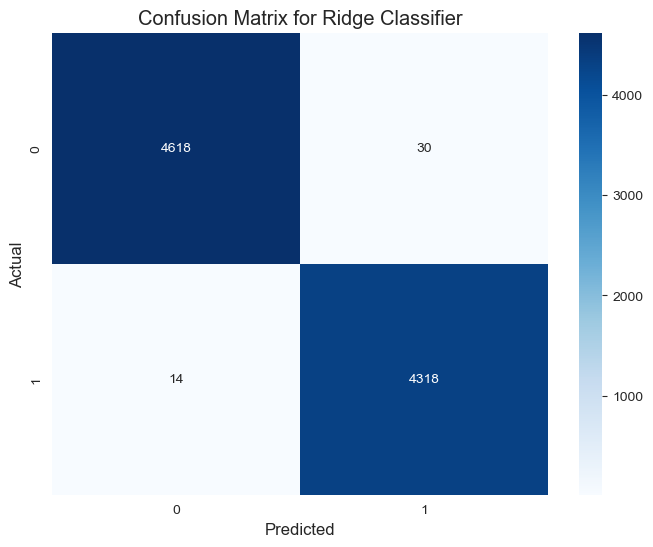

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_ridge), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Ridge Classifier')
plt.show()

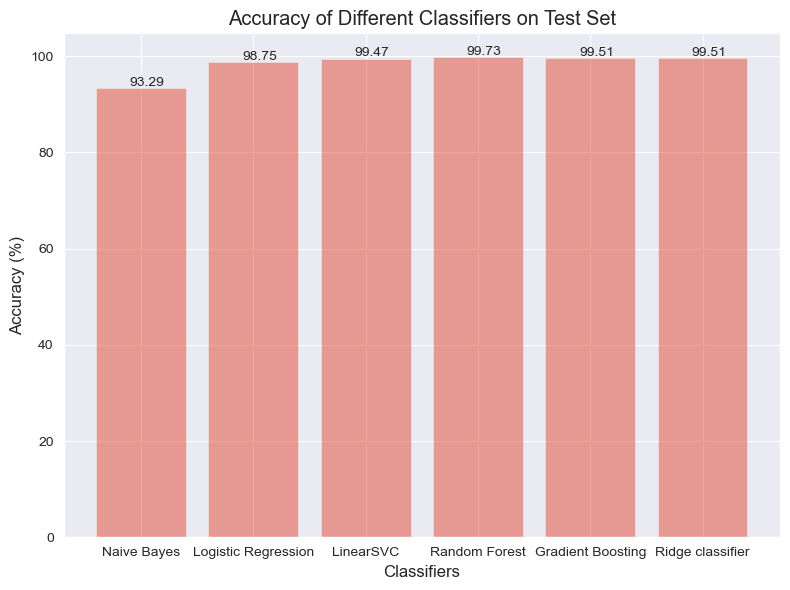

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the accuracy for each classifier
accuracy_nb = round(accuracy_score(y_test, y_pred_nb) * 100, 2)
accuracy_lr = round(accuracy_score(y_test, y_pred_lr) * 100, 2)
accuracy_svm = round(accuracy_score(y_test, y_pred_svm) * 100, 2)
accuracy_rf = round(accuracy_score(y_test, y_pred_rf) * 100, 2)
accuracy_gb = round(accuracy_score(y_test, y_pred_gb) * 100, 2)
accuracy_ridge = round(accuracy_score(y_test, y_pred_ridge) * 100, 2)

# Create a bar plot for the accuracy of each classifier
classifiers = ['Naive Bayes', 'Logistic Regression', 'LinearSVC', 'Random Forest','Gradient Boosting','Ridge classifier']
accuracy = [accuracy_nb, accuracy_lr, accuracy_svm, accuracy_rf,accuracy_gb,accuracy_ridge]

y_pos = np.arange(len(classifiers))

plt.figure(figsize=(8,6))
plt.bar(y_pos, accuracy, align='center', alpha=0.5)
plt.xticks(y_pos, classifiers)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Classifiers on Test Set')
plt.tight_layout()

# Add labels for the bars
for i in range(len(accuracy)):
    plt.text(x=i-0.1, y=accuracy[i]+0.5, s=str(accuracy[i]))

plt.show()

Making a Predictive System

In [ ]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)

# Predictions on the test set
y_pred_rf = rf_classifier.predict(X_test_tfidf)

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4672
           1       1.00      1.00      1.00      4308

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Confusion Matrix:
 [[4667    5]
 [  15 4293]]


In [ ]:
user_input = ["This is the text that the user wants to predict."]
user_input_tfidf = tfidf_vectorizer.transform(user_input)
user_prediction = rf_classifier.predict(user_input_tfidf)

if user_prediction[0] == 0:
    prediction_result = "false"
else:
    prediction_result = "true"

print("User Input:", user_input[0])
print("Predicted Outcome:", prediction_result)

NameError: name 'tfidf_vectorizer' is not defined

In [ ]:
import pickle

In [ ]:
fileaname ="Final_model.sav"
pickle.dump(rf_classifier,open(fileaname,'wb'))

In [ ]:
load_model=pickle.load(open('Final_model.sav','rb'))

In [ ]:
user_input = [input("Enter the aarticle")]
user_input_tfidf = tfidf_vectorizer.transform(user_input)
user_prediction = load_model.predict(user_input_tfidf)

if user_prediction[0] == 0:
    prediction_result = "false"
else:
    prediction_result = "true"

print("User Input:", user_input[0])
print("Predicted Outcome:", prediction_result)

User Input: This is the text that the user wants to predict.
Predicted Outcome: true


In [73]:
import joblib
from sklearn.ensemble import RandomForestClassifier


In [74]:
joblib.dump(rf_classifier, 'rf_model.pkl')

['rf_model.pkl']

In [75]:
# ... (vectorizer training code for tfidf_vectorizer)

# Save the trained TF-IDF vectorizer to a file named 'tfidf_vectorizer.pkl'
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [81]:

joblib.dump(svm_classifier,'svm_model.pkl')
#joblib.dump(knn_classifier,'knn_model.pkl')
#joblib.dump(GB_classifier,'GB_model.pkl')
#joblib.dump(ridge_classifier,'ridge_model.pkl')

['svm_model.pkl']

In [82]:
joblib.dump(nb_classifier,'nb_model.pkl')
joblib.dump(lr_classifier,'lr_model.pkl')

['lr_model.pkl']